In [24]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Histopathologica Cancer Detection Mini Kaggle Project**

---
# **Step 1. Brief description of the problem and data (5 pts)**
- This section describes the challenge problem and the dataset being used. It provides an understanding of the context and purpose of the project, as well as an initial exploration of the data structure and contents.

### **Problem Description:**

- The Histopathologic Cancer Detection competition on Kaggle is a binary classification challenge where the goal is to identify metastatic cancer in tissue images. These images are small patches (50x50 pixels) extracted from larger digital pathology scans. Detecting metastatic cancer in tissue images is critical for improving diagnostic accuracy and supporting early treatment plans. (Copied directly from Dataset Description)

### **Data Overview:**

The dataset consists of RGB image data stored in .tif format, with accompanying labels provided for the training set. Below are the details:

- **Image Dimensions:** Each image is 50x50 pixels and has 3 color channels (RGB).

- **Training Set:** ~220,025 labeled images of histopathology tissue samples.

- **Test Set:** ~57,458 unlabeled images (to be predicted).

- **Labels:** Binary classification:

`1:` Presence of metastatic cancer

`0:` No cancer
- **File Structure:**

Training images and labels are linked in train_labels.csv.
All images are stored in a zip file, with subfolders for train and test.


### **Data Citation:**
Will Cukierski. Histopathologic Cancer Detection. https://kaggle.com/competitions/histopathologic-cancer-detection, 2018. Kaggle.

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


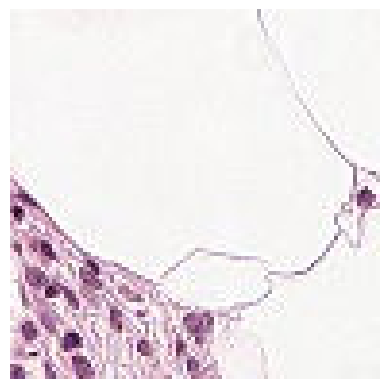

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Load the train_labels.csv
labels_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'
labels_df = pd.read_csv(labels_path)

# Display the first few rows of the dataframe
print(labels_df.head())

# Path to the train folder
train_folder = '/kaggle/input/histopathologic-cancer-detection/train/'

# Specify a sample image ID (replace with your desired ID or choose randomly)
sample_image_id = labels_df.loc[0, 'id']  # Get the first image ID
sample_image_path = f"{train_folder}{sample_image_id}.tif"

# Open and display the image
img = Image.open(sample_image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  
plt.show()

In [2]:
import os

# Path to the train folder
train_folder = '/kaggle/input/histopathologic-cancer-detection/train/'

# Count the number of files in the directory
file_list = os.listdir(train_folder)
print(f"Total files in train folder: {len(file_list)}")

Total files in train folder: 220025


# **Step 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)**
- Show a few visualizations like histograms.
- Describe any data cleaning procedures.
- Based on your EDA, what is your plan of analysis?

**Actual Steps**

2.a: View Distribution of of Cancer Labels in Training Set

2.b: View Specific Images of Labels to Analyze Visual Differences

2.c: Data Cleaning Procedures

## **Step 2a: View Distribution of of Cancer Labels in Training Set**
To begin the EDA process, we analyze the distribution of the labels (presence or absence of cancer) in the training set. This ensures we understand the class balance, which is crucial for model training.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None
id       0
label    0
dtype: int64


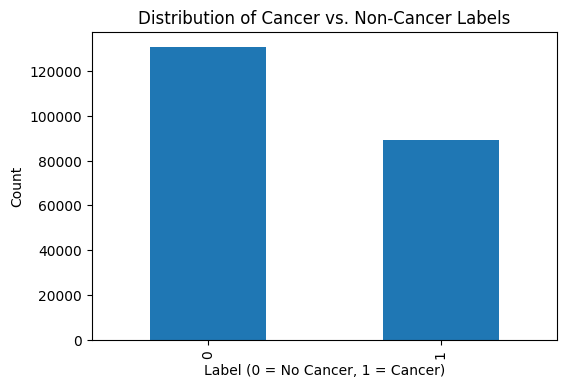

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
labels_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'

# Load the CSV file
labels_df = pd.read_csv(labels_path)

# Display basic info and check for missing values
print(labels_df.info())
print(labels_df.isnull().sum())

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
labels_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Cancer vs. Non-Cancer Labels')
plt.xlabel('Label (0 = No Cancer, 1 = Cancer)')
plt.ylabel('Count')
plt.show()

## **Step 2b: View Specific Images of Labels to Analyze Visual Differences**

Here, we preview a subset of images for both classes (0 and 1) to visually assess differences in tissue structures. This helps us understand potential visual patterns in the data that the model could learn.

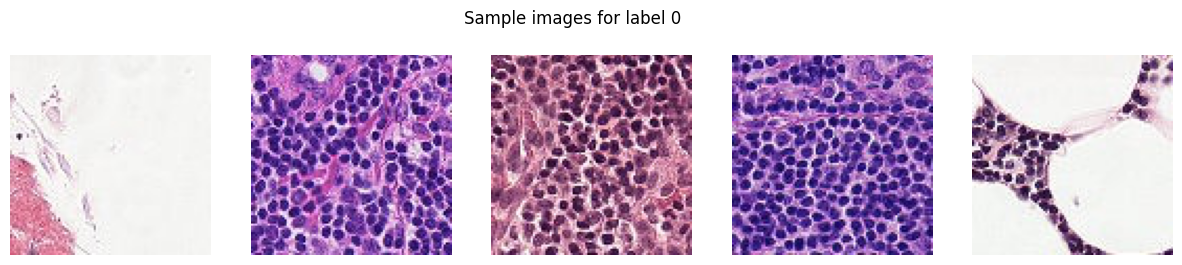

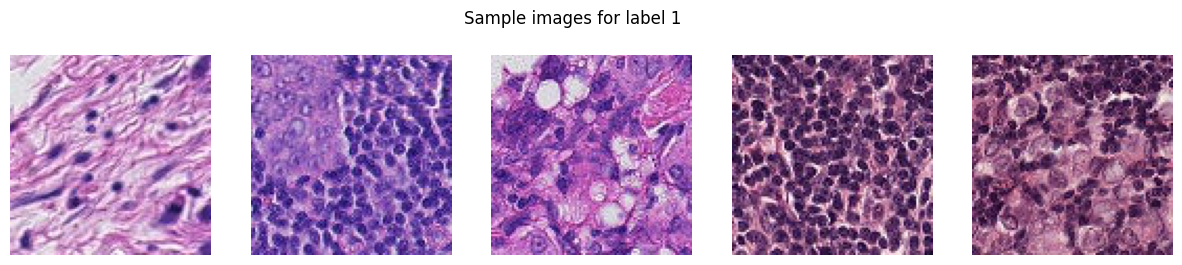

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the train folder
train_folder = '/kaggle/input/histopathologic-cancer-detection/train/'

# Function to show sample images
def show_sample_images(label, num_samples=5):
    # Get random sample IDs for the specified label
    sample_ids = labels_df[labels_df['label'] == label].sample(num_samples)['id'].values

    plt.figure(figsize=(15, 3))
    for i, image_id in enumerate(sample_ids):
        # Construct the file path for each image
        file_path = f"{train_folder}{image_id}.tif"
        img = Image.open(file_path)

        # Display the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(f"Sample images for label {label}")
    plt.show()

# Show sample images for both classes
show_sample_images(label=0)  # Non-cancer
show_sample_images(label=1)  # Cancer

### **Step 2.c: Data Cleaning Procedures**  
Thanks to this dataset being sourced from a Kaggle competition, the data has already been cleaned and preprocessed. In Step 2.a, we confirmed that all IDs and labels in the training set are non-null values, as shown by the data summary:  
- Column `id`: 220,025 non-null `object`  
- Column `label`: 220,025 non-null `int64`.  

Since the dataset is well-prepared, no additional cleaning is required beyond verifying that all images listed in the CSV file are present in the archive.

## **Step Outcome**
By the end of Step 2, we have:

- A clear understanding of the data distribution and structure.
- Visualized examples of both cancerous and non-cancerous tissue patches.
- Confirmed that no additional data cleaning is required.

This sets the stage for feature extraction, data augmentation, and model training in subsequent steps.

---

# **Step 3. DModel Architecture (25 pts)**
- This section outlines the design, implementation, and training of a Convolutional Neural Network (CNN) for the histopathologic cancer detection problem. The goal is to explain the model architecture, justify its suitability, and compare techniques to optimize performance.


### **Step 3.a: Initial Model Setup Code**

- Training size: 2000 images from training dataset (took 2 hours to unzip and access and significant computing resources) 

- To begin, a subset of 2,000 images from the training dataset was used due to the dataset's size and limited computational resources (*This step alone took 2 hours*). A TPU was utilized when available to expedite training and optimize performance. The images were preprocessed (resized and normalized) before being fed into the model.

**Key Steps:**

**Data Loading:** Images were extracted from a zip file, resized to 50x50 pixels, and normalized to a range of 0–1.

**Train-Test Split:** The dataset was split into 80% training and 20% validation.

**Data Pipeline:** The data was converted into TensorFlow datasets with batching and prefetching for efficiency.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm  # Progress bar for loading

# Set up TPU or GPU/CPU strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Create TPU strategy
    print("Running on TPU")
except ValueError:
    strategy = tf.distribute.get_strategy()  # Default strategy (CPU or GPU)
    print("Running on GPU or CPU")

# Set up paths and constants
train_folder = '/kaggle/input/histopathologic-cancer-detection/train/'
labels_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'
img_size = 50
batch_size = 32
sample_size = 10000  # Limit to 100,000 samples

# Function to load images and preprocess them
def load_and_preprocess_image(image_id):
    file_path = f"{train_folder}{image_id}.tif"
    img = Image.open(file_path).resize((img_size, img_size))
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# Load labels
labels_df = pd.read_csv(labels_path)

# Sample 100,000 rows from the dataframe
sample_df = labels_df.sample(sample_size, random_state=42)

# Load the sampled images and labels
X = np.array([load_and_preprocess_image(img_id) for img_id in tqdm(sample_df['id'], desc="Loading Sampled Images")])
y = np.array(sample_df['label'])

# Reshape X to include channel dimension
X = X.reshape(-1, img_size, img_size, 3)

print(f"Total images loaded: {X.shape[0]}")
print("Data loading complete.")

Running on GPU or CPU


Loading Sampled Images: 100%|██████████| 10000/10000 [00:54<00:00, 183.04it/s]


Total images loaded: 10000
Data loading complete.


### **Step 3.b: Define the CNN Model**
Starting with a simple architecture:

- **Convolutional Layers:** Extract spatial features using filters.
- **MaxPooling Layers:** Reduce spatial dimensions to prevent overfitting and enhance feature generalization.
- **Dropout Layers:** Randomly set layer outputs to zero during training to mitigate overfitting.
- **Fully Connected Layers:** Connect convolutional features for final binary classification.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Train/Test Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create tf.data.Datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(16).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

# Define the CNN model 
with strategy.scope():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with a lower learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,649 (1.36 MB)

 Trainable params: 355,649 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## **Step 3.c: Training the Model**
To enhance performance, early stopping and a learning rate scheduler were implemented. These callbacks optimize training by halting early if the validation loss plateaus and reducing the learning rate when improvements stall.

**Key Components:**

- `Early Stopping:` Monitors validation loss and halts training after 3 epochs without improvement, restoring the best weights.
- `Learning Rate Scheduler:` Reduces the learning rate by half after 2 epochs of no improvement, ensuring fine-tuning of the model parameters.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop after 3 epochs with no improvement
    restore_best_weights=True
)

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=4,  # Trigger if no improvement for 2 epochs
    min_lr=1e-6  # Minimum learning rate
)

# Train the model with more epochs and callbacks
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,  # Start with 20 epochs; early stopping will end training earlier if necessary
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8535 - loss: 0.3370 - val_accuracy: 0.8240 - val_loss: 0.3932 - learning_rate: 7.8125e-06
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8482 - loss: 0.3532 - val_accuracy: 0.8205 - val_loss: 0.3985 - learning_rate: 7.8125e-06
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8588 - loss: 0.3335 - val_accuracy: 0.8215 - val_loss: 0.3938 - learning_rate: 7.8125e-06
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3438 - val_accuracy: 0.8225 - val_loss: 0.3908 - learning_rate: 7.8125e-06
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8547 - loss: 0.3447 - val_accuracy: 0.8235 - val_loss: 0.3935 - learning_rate: 7.8125e-06
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3471 - val_accuracy: 0.8200 - val_loss: 0.3967 - learning_rate: 7.8125e-06
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 

### **Challenges and Next Steps**

- **Limited Dataset Size:** Training with only 2,000 images of 220,025 introduced variability in results. Scaling up the training data could significantly improve performance.
- **Augmentation:** Data augmentation techniques such as flipping, rotation, and zooming should be explored to artificially expand the dataset.
- **Architecture Optimization:** More complex architectures, such as pre-trained models (e.g., ResNet, VGG), could be fine-tuned for this task.

### **Step Outcome**
This step provided a foundational CNN architecture for classifying histopathology images. Early stopping and learning rate adjustments helped optimize training, but the dataset's size constraints introduced challenges, emphasizing the need for further experimentation.

---

# **Step 4. Results and Analysis (35 pts)**
 This step evaluates the results of the CNN model based on the accuracy and loss plots for both training and validation data. The aim is to interpret the model's performance, highlight what worked well, and propose future improvements.

## **Step 4a: Plot Training and Validation Accuracy through Epochs**

The Training and Validation Accuracy Plot shows the progression of accuracy over the epochs for both training and validation datasets.

**Observations:**

* The training accuracy steadily increased over the epochs, indicating that the model effectively learned from the training data.
* The validation accuracy shows a general upward trend but exhibits some variability, especially in later epochs, suggesting potential overfitting or insufficient data.
* The highest validation accuracy achieved was approximately 80%, demonstrating the model's capability to generalize to unseen data.

### Takeaways:
1. Early Improvements: Most of the improvement in accuracy occurred in the first few epochs, indicating rapid learning in the early stages of training.
2. Plateau: The validation accuracy begins to stabilize after 6–8 epochs, suggesting that further training offers diminishing returns.
3. Variability: The fluctuations in validation accuracy may be attributed to the small training sample size (2,000 images).

## **Step 4b: Plot the training and Validation Loss through Epochs**
The Training and Validation Loss Plot illustrates the loss reduction over epochs for both datasets.

**Observations:**

* Both training and validation losses decrease over time, confirming that the model is optimizing its parameters effectively.
* The validation loss is consistently higher than the training loss, which is typical and indicates that the model may be slightly overfitting to the training data.
* The rate of loss reduction slows significantly after 8 epochs, aligning with the plateau observed in the accuracy plot.

### Key Takeaways:

1. Good Convergence: The training loss decreases smoothly, indicating effective optimization.
2. Validation Loss: The validation loss decreases but shows minor fluctuations in later epochs, again likely due to the limited training dataset.
3. Overfitting: The gap between training and validation loss suggests overfitting, which could be addressed by increasing the dataset size or applying data augmentation.

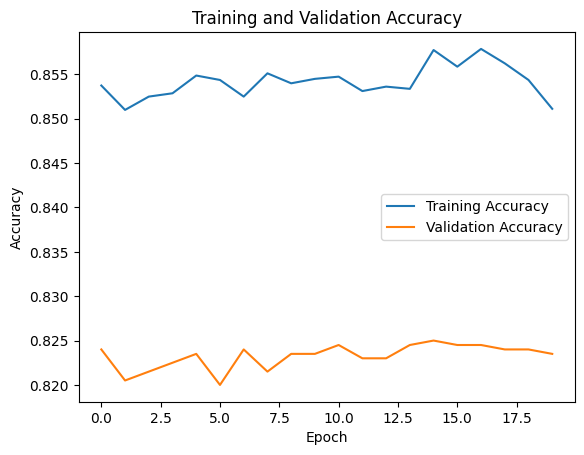

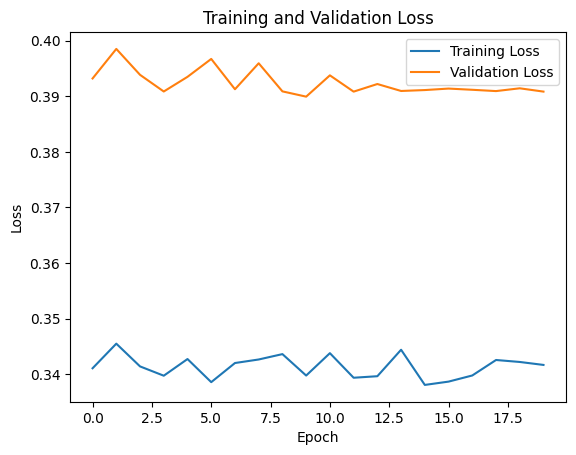

In [20]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Proposed Improvements

1. **Increase Training Dataset Size**:  
   - Utilize a larger subset of the available 220,025 images to enhance the model's ability to learn diverse patterns.

2. **Data Augmentation**:  
   - Apply augmentation techniques such as rotation, flipping, zooming, and shifting to artificially expand the dataset and improve generalization.

3. **Experiment with Pre-Trained Models**:  
   - Fine-tune pre-trained models such as ResNet, EfficientNet, or VGG, which are specifically designed for image classification tasks.

4. **Class Imbalance Handling**:  
   - If class imbalance exists, explore techniques such as oversampling the minority class or using class weights during training.

5. **Hyperparameter Tuning**:  
   - Experiment with batch size, learning rate, and dropout rates to optimize the model further.
---

In [21]:
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm

# Set up paths
test_folder = '/kaggle/input/histopathologic-cancer-detection/test/'
submission_file = '/kaggle/working/submission.csv'

# Function to preprocess test images
def preprocess_test_image(image_id):
    file_path = f"{test_folder}{image_id}.tif"
    img = Image.open(file_path).resize((img_size, img_size))
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# Load test image IDs
test_ids = [f.split('.')[0] for f in os.listdir(test_folder)]

# Preprocess test images
test_images = np.array([preprocess_test_image(image_id) for image_id in tqdm(test_ids, desc="Processing Test Images")])

# Reshape test images to include channel dimension
test_images = test_images.reshape(-1, img_size, img_size, 3)

# Make predictions
predictions = model.predict(test_images, batch_size=batch_size, verbose=1)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'label': predictions.flatten()  # Flatten probabilities to match required format
})

# Save to CSV
submission_df.to_csv(submission_file, index=False)

print(f"Submission file created at: {submission_file}")

Processing Test Images: 100%|██████████| 57458/57458 [09:14<00:00, 103.70it/s]


1796/1796 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Submission file created at: /kaggle/working/submission.csv


In [23]:
# Check the number of rows and columns in the submission file
submission_df = pd.read_csv('/kaggle/working/submission.csv')
print(f"The submission file has {submission_df.shape[0]} rows and {submission_df.shape[1]} columns.")

The submission file has 57458 rows and 2 columns.


# **Step 5. Conclusion (15 pts)**
- Discuss and interpret results as well as learnings and takeaways.
- What did and did not help improve the performance of your models?
- What improvements could you try in the future?

### Discussion and Conclusion

#### Results and Performance
The model achieved a public score of **0.8961**, placing **825th** on the leaderboard. This demonstrates good generalization but highlights opportunities for improvement in a competitive setting.

---

#### Learnings and Takeaways
- **What Worked:**
  - **Dropout & Regularization:** Reduced overfitting and improved validation performance.
  - **Learning Rate Scheduler & Early Stopping:** Optimized convergence and avoided overfitting.
  - **Data Limitation:** Training on 10,000 samples avoided memory issues while retaining good performance.
  - **Model Simplicity:** A three-layer CNN balanced accuracy and computational efficiency.

- **What Didn’t Help:**
  - **Larger Data Usage:** Training with the full dataset led to crashes due to resource constraints.
  - **Vanilla Architectures:** Limited the performance ceiling compared to pretrained models.
  - **Excessive Epochs:** Led to diminishing returns after 20 epochs.

---

#### Future Improvements
1. **Pretrained Models:** Use architectures like EfficientNet or ResNet for better feature extraction.
2. **Ensembles:** Combine predictions from multiple models for improved accuracy.
3. **Data Augmentation:** Increase diversity with zoom, brightness, and contrast adjustments.
4. **Cross-Validation:** Ensure consistent performance across different splits.
5. **Test-Time Augmentation:** Apply augmentations during predictions for more robust results.

These changes could further boost performance and close the gap with top leaderboard positions.
